In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version = 1)



/home/nitesh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist['url']

'https://www.openml.org/d/554'

In [7]:
mnist['target_names']

['class']

In [8]:
X,y = mnist['data'], mnist['target']

In [9]:
X.shape

(70000, 784)

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
y.shape

(70000,)

In [12]:
type(y)

pandas.core.series.Series

In [13]:
type(X.iloc[0])

pandas.core.series.Series

In [14]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Saving figure some_digit_plot


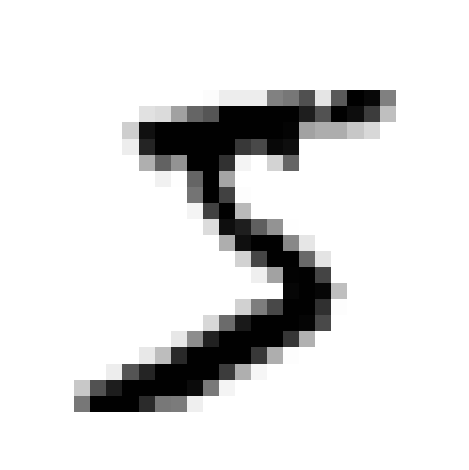

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np

some_digit=  X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image , cmap = 'binary')
plt.axis('off')
save_fig('some_digit_plot')
plt.show()

In [16]:
y[0]

'5'

In [17]:
y = y.astype(np.uint8)

In [18]:
y[0]

5

In [19]:
type(y[0])

numpy.uint8

In [20]:
X = X.to_numpy()

In [21]:
def plot_digit(data):
    images = data.reshape(28,28)
    plt.imshow(images , cmap ='binary', interpolation= 'nearest')
    plt.axis('off')

In [ ]:
def plot_digits(instances, images_per_row = 10, **options):
    size = 28
    images_per_row = min(len(instances) , images_per_row)
    n_rows = (len(instances)-1)//images_per_row+1
    
    n_empty = n_rows*images_per_row-len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty,size*size))], axis = 0)
    
    images_grid = padded_instances.reshape((n_rows , images_per_row , size,size))
    
    big_images = images_grid.transpose(0,2,1,3).reshape(n_rows * size , images_per_row*size)

    plt.imshow(big_images , cmap = 'binary', **options)
    plt.axis('off')
    

In [ ]:
plt.figure(figsize = (9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
X_train.shape

In [ ]:
y_train_5 = (y_train==5)
y_test_5 = (y_test == 5)

In [ ]:
y_train[:5].values

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

Performance Measures

Measuring Accuracy using Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state= 42)

for train_index , test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    clone_clf.fit(X_train_folds , y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, scoring = 'accuracy', cv = 3)

In [ ]:

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5 , scoring = 'accuracy', cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
con_mat = confusion_matrix(y_train_5, y_train_pred)
con_mat

In [ ]:
plt.matshow(con_mat)

In [ ]:
y_train_perfect_prediction = y_train_5

plt.matshow(confusion_matrix(y_train_5, y_train_perfect_prediction), cmap = 'gray')
confusion_matrix(y_train_5, y_train_perfect_prediction)

In [ ]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5, y_train_pred)

In [ ]:
con_mat[1,1]/(con_mat[0,1]+con_mat[1,1,])

In [ ]:
recall_score(y_train_5, y_train_pred)

In [ ]:
con_mat[1,1]/sum(con_mat[1,:])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])

In [ ]:
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = y_scores>threshold

In [ ]:
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,method = 'decision_function', cv = 3)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5 , y_scores)

In [ ]:
precisions.shape

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision', linewidth= 2)
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall', linewidth = 2)
    plt.xlabel('Threshold', fontsize = 16)
    plt.legend(loc = 'center right', fontsize = 16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])

In [ ]:
recall_90_precision = recalls[np.argmax(precisions>=0.90)]
threshold_90_precision = thresholds[np.argmax(precisions>0.90)]
recall_90_precision

In [ ]:
threshold_90_precision

In [ ]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision],[0,0.9], 'r:')
plt.plot([-50000, threshold_90_precision], [0.9,0.9], 'r:')
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [ ]:
(y_train_pred == (y_scores>0)).all()

In [ ]:
type(y_train_pred)

In [ ]:
y_train_pred[:5]

In [ ]:
def plot_precision_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth = 2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0,1,0,1])
    plt.grid(True)
    
plt.figure(figsize=(8,6))
plot_precision_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0,0.9], 'r:')
plt.plot([0, recall_90_precision],[0.9,0.9], 'r:')
plt.plot([recall_90_precision], [0.9], 'ro')
plt.show()


In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]

In [ ]:
threshold_90_precision

In [ ]:
y_train_pred_90 = y_scores>threshold_90_precision

In [ ]:
precision_score(y_train_5,y_train_pred_90)

In [ ]:
threshold_99_precision = thresholds[np.argmax(precisions>=0.99)]
y_train_pred_99 = y_scores>threshold_99_precision
threshold_99_precision

In [152]:
precision_score(y_train_5, y_train_pred_99)

1.0

In [151]:
recall_score(y_train_5,y_train_pred_99)

0.0007378712414683637

In [154]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5 , y_scores)

Saving figure roc_curve_plot


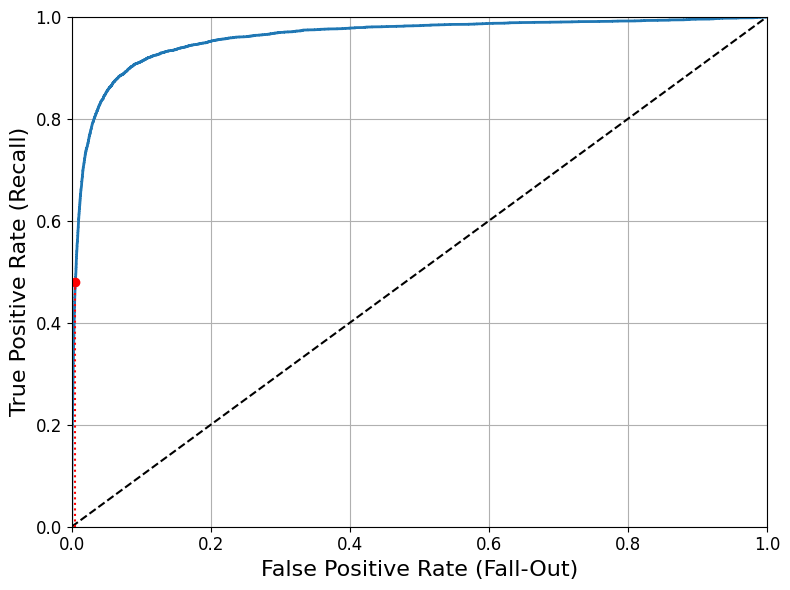

In [156]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr,tpr,linewidth = 2, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize = 16)
    plt.ylabel('True Positive Rate (Recall)' , fontsize = 16)
    plt.grid(True)
    
plt.figure(figsize = (8,6))
plot_roc_curve(fpr,tpr)
fpr_90 = fpr[np.argmax(tpr>=recall_90_precision)]

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()


Multiclass Classification

In [157]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [158]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [159]:
some_digit_score = svm_clf.decision_function([some_digit])

In [160]:
some_digit_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [161]:
np.argmax(some_digit_score)

5

In [162]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [164]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [1]:
len(ovr_clf.est)

NameError: name 'ovr_clf' is not defined

Exercise 2

In [22]:
from scipy.ndimage.interpolation import shift

In [32]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

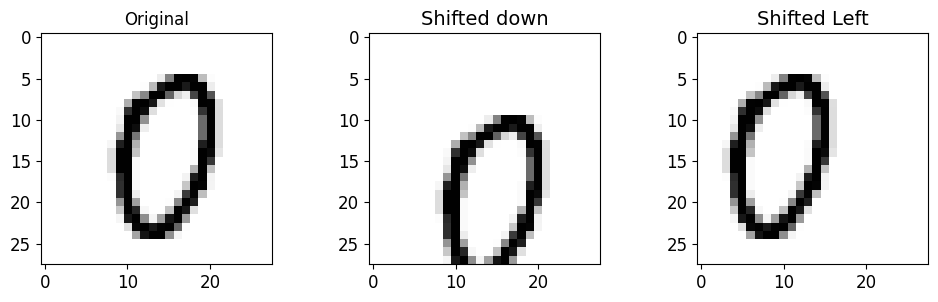

In [33]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0,5)
shift_image_left = shift_image(image, -5,0)

import matplotlib.pyplot as plt

plt.figure(figsize =(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image.reshape(28,28),interpolation='nearest', cmap = 'Greys')
plt.subplot(132)
plt.title('Shifted down', fontsize = 14)
plt.imshow(shifted_image_down.reshape(28,28), interpolation = 'nearest', cmap = 'Greys')
plt.subplot(133)
plt.title('Shifted Left', fontsize = 14)
plt.imshow(shift_image_left.reshape(28,28),interpolation = 'nearest', cmap = 'Greys')
plt.show()

In [34]:

X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx,dy))
        y_train_augmented.append(label)
        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [35]:
X_train.shape


(60000, 784)

In [37]:
X_train_augmented.shape


(300000, 784)

In [38]:
shuffled_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffled_idx]
y_train_augmented = y_train_augmented[shuffled_idx]

In [39]:
from sklearn.neighbors import KNeighborsClassifier

NameError: name 'grid_search' is not defined